In [256]:
# importing necessary libraries 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

# reading the dataset into dataframe 
dfs = pd.read_excel('nutrition_elderly.xls')
# reading the first 5 rows of h]the dataset 
dfs.head()


,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,2,1,0,0,151,58,72,4,3,1,4,5,6
1,2,1,1,1,162,60,68,5,2,5,5,1,4
2,2,1,0,4,162,75,78,3,1,5,2,5,4
3,2,1,0,0,154,45,91,0,4,4,0,3,2
4,2,1,2,1,154,50,65,5,3,5,5,3,2


In [257]:
dfs.info()
# printing summary of the dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            226 non-null    int64
 1   situation         226 non-null    int64
 2   tea               226 non-null    int64
 3   coffee            226 non-null    int64
 4   height            226 non-null    int64
 5   weight            226 non-null    int64
 6   age               226 non-null    int64
 7   meat              226 non-null    int64
 8   fish              226 non-null    int64
 9   raw_fruit         226 non-null    int64
 10  cooked_fruit_veg  226 non-null    int64
 11  chocol            226 non-null    int64
 12  fat               226 non-null    int64
dtypes: int64(13)
memory usage: 23.1 KB


In [413]:
dfs.duplicated().isna().sum() # checking for duplicated values 

0

In [260]:
dfs['gender'].unique()

array([2, 1])

In [261]:
# Mapping/replacing the gender column with information in the data dictionary

category = {
    1: 'male',
    2: 'female'
}

In [262]:
dfs['gender'].map(category)

0      female
1      female
2      female
3      female
4      female
        ...  
221    female
222    female
223      male
224    female
225    female
Name: gender, Length: 226, dtype: object

In [263]:
dfs['gender'] = dfs['gender'].map(category).astype('category')

In [264]:
dfs.head()

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,female,1,0,0,151,58,72,4,3,1,4,5,6
1,female,1,1,1,162,60,68,5,2,5,5,1,4
2,female,1,0,4,162,75,78,3,1,5,2,5,4
3,female,1,0,0,154,45,91,0,4,4,0,3,2
4,female,1,2,1,154,50,65,5,3,5,5,3,2


In [265]:
dfs.columns

Index(['gender', 'situation', 'tea', 'coffee', 'height', 'weight', 'age',
       'meat', 'fish', 'raw_fruit', 'cooked_fruit_veg', 'chocol', 'fat'],
      dtype='object')

In [266]:
#mapping/replacing the situation column with information in the data dictionary

status = {
    1: 'single',
    2: 'couple',
    3: 'family',
    4: 'living with someone else'
}

dfs['situation'] = dfs['situation'].map(status).astype('category')

In [267]:
dfs['tea'].unique()

array([ 0,  1,  2,  3,  4,  9, 10,  6,  5])

In [268]:
# mapping/replacing the meat, fish, chocol, raw-fruit and cooked fruit veg columns 
# with information in the data dictionary

consumption = {
    0: 'never',
    1: 'less than once a week',
    2: 'once a week',
    3: '2/3 times a week',
    4: '4/6 times a week', 
    5: 'every day'
}

diet_columns = ['meat', 'fish', 'chocol', 'raw_fruit', 'cooked_fruit_veg']
for column in diet_columns:
    dfs[column] = dfs[column].map(consumption).astype('category')

In [269]:
dfs.head()

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,female,single,0,0,151,58,72,4/6 times a week,2/3 times a week,less than once a week,4/6 times a week,every day,6
1,female,single,1,1,162,60,68,every day,once a week,every day,every day,less than once a week,4
2,female,single,0,4,162,75,78,2/3 times a week,less than once a week,every day,once a week,every day,4
3,female,single,0,0,154,45,91,never,4/6 times a week,4/6 times a week,never,2/3 times a week,2
4,female,single,2,1,154,50,65,every day,2/3 times a week,every day,every day,2/3 times a week,2


In [270]:
# mapping the fat column with information in the data dictionary 
consumption_fat = {
    1: 'butter',
    2: 'margarine',
    3: 'peanut oil',
    4: 'sunflower oil',
    5: 'olive oil',
    6: 'mixed veg oil',
    7: 'colza oil',
    8: 'duck or goose fat'
     
}

dfs['fat'] = dfs['fat'].map(consumption_fat).astype('category')
dfs.head()

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat
0,female,single,0,0,151,58,72,4/6 times a week,2/3 times a week,less than once a week,4/6 times a week,every day,mixed veg oil
1,female,single,1,1,162,60,68,every day,once a week,every day,every day,less than once a week,sunflower oil
2,female,single,0,4,162,75,78,2/3 times a week,less than once a week,every day,once a week,every day,sunflower oil
3,female,single,0,0,154,45,91,never,4/6 times a week,4/6 times a week,never,2/3 times a week,margarine
4,female,single,2,1,154,50,65,every day,2/3 times a week,every day,every day,2/3 times a week,margarine


In [271]:
dfs['fat'].value_counts()

sunflower oil        68
peanut oil           48
olive oil            40
margarine            27
mixed veg oil        23
butter               15
duck or goose fat     4
colza oil             1
Name: fat, dtype: int64

In [272]:
# BMI  = weight(kg)/square of height in metres

In [296]:
dfs['BMI'] = dfs['weight'] / (dfs['height']/100)**2 # Estimating Body Mass Index (BMI)

In [338]:
# defining a function to categorize the BMI
def weight_status(dfs):
    
        if dfs['BMI'] < 18.5:
            return'underweight'
        
        elif dfs['BMI'] >= 18.5 and dfs['BMI'] < 25.0: 
            return 'normal weight'
        
        elif dfs['BMI'] >= 25.0 and dfs['BMI'] < 30.0:
            return 'over weight'
        
        elif dfs['BMI'] >= 30.0 and dfs['BMI'] < 35.0:
            return 'obesity class I'
        
        elif dfs['BMI'] >= 35.0 and dfs['BMI'] < 40.0:
            return 'obesity class II'
        
        else:
            return 'obesity class III'

In [339]:
dfs['weight_status'] = dfs.apply(weight_status, axis=1) # applying the function to our dataframe 

In [408]:
dfs.tail(10) # Last 10 rows of our dataframe 

,gender,situation,tea,coffee,height,weight,age,meat,fish,raw_fruit,cooked_fruit_veg,chocol,fat,BMI,weight_status
216,female,couple,0,5,153,53,69,4/6 times a week,2/3 times a week,every day,every day,less than once a week,olive oil,22.640865,normal weight
217,female,couple,2,0,165,64,75,4/6 times a week,2/3 times a week,every day,4/6 times a week,every day,olive oil,23.507805,normal weight
218,male,couple,0,0,171,85,73,4/6 times a week,2/3 times a week,every day,4/6 times a week,less than once a week,olive oil,29.068773,over weight
219,male,couple,0,5,167,76,82,2/3 times a week,2/3 times a week,every day,4/6 times a week,every day,mixed veg oil,27.250887,over weight
220,female,couple,2,1,157,58,77,2/3 times a week,2/3 times a week,every day,4/6 times a week,every day,mixed veg oil,23.530366,normal weight
221,female,single,0,1,160,73,74,4/6 times a week,2/3 times a week,every day,every day,less than once a week,mixed veg oil,28.515625,over weight
222,female,couple,0,3,163,62,68,4/6 times a week,2/3 times a week,4/6 times a week,4/6 times a week,less than once a week,peanut oil,23.335466,normal weight
223,male,couple,0,2,170,74,71,4/6 times a week,2/3 times a week,4/6 times a week,4/6 times a week,less than once a week,peanut oil,25.605536,over weight
224,female,single,0,2,154,45,77,4/6 times a week,2/3 times a week,2/3 times a week,every day,2/3 times a week,olive oil,18.974532,normal weight
225,female,couple,2,0,159,63,69,2/3 times a week,2/3 times a week,every day,every day,less than once a week,sunflower oil,24.919900,normal weight


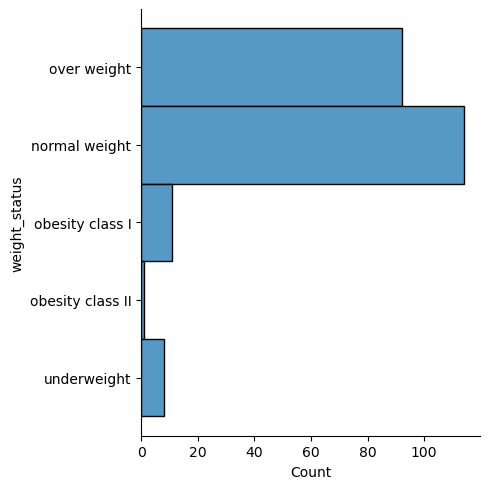

In [404]:
sns.displot(data=dfs, y="weight_status")

<AxesSubplot:xlabel='count', ylabel='weight_status'>

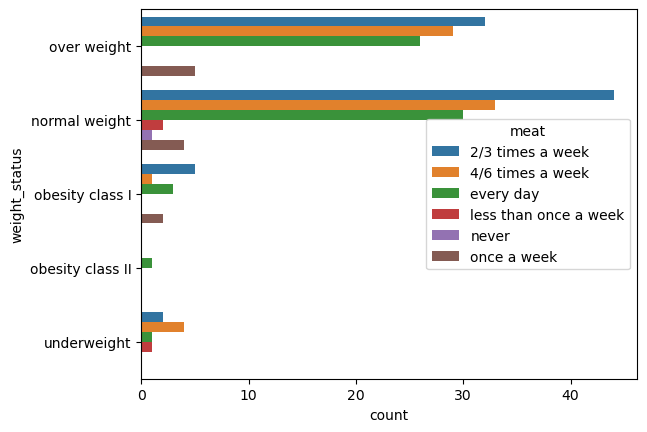

In [395]:
#plotting the weight status in respect to meat 
sns.countplot(data=dfs, y="weight_status", hue="meat")

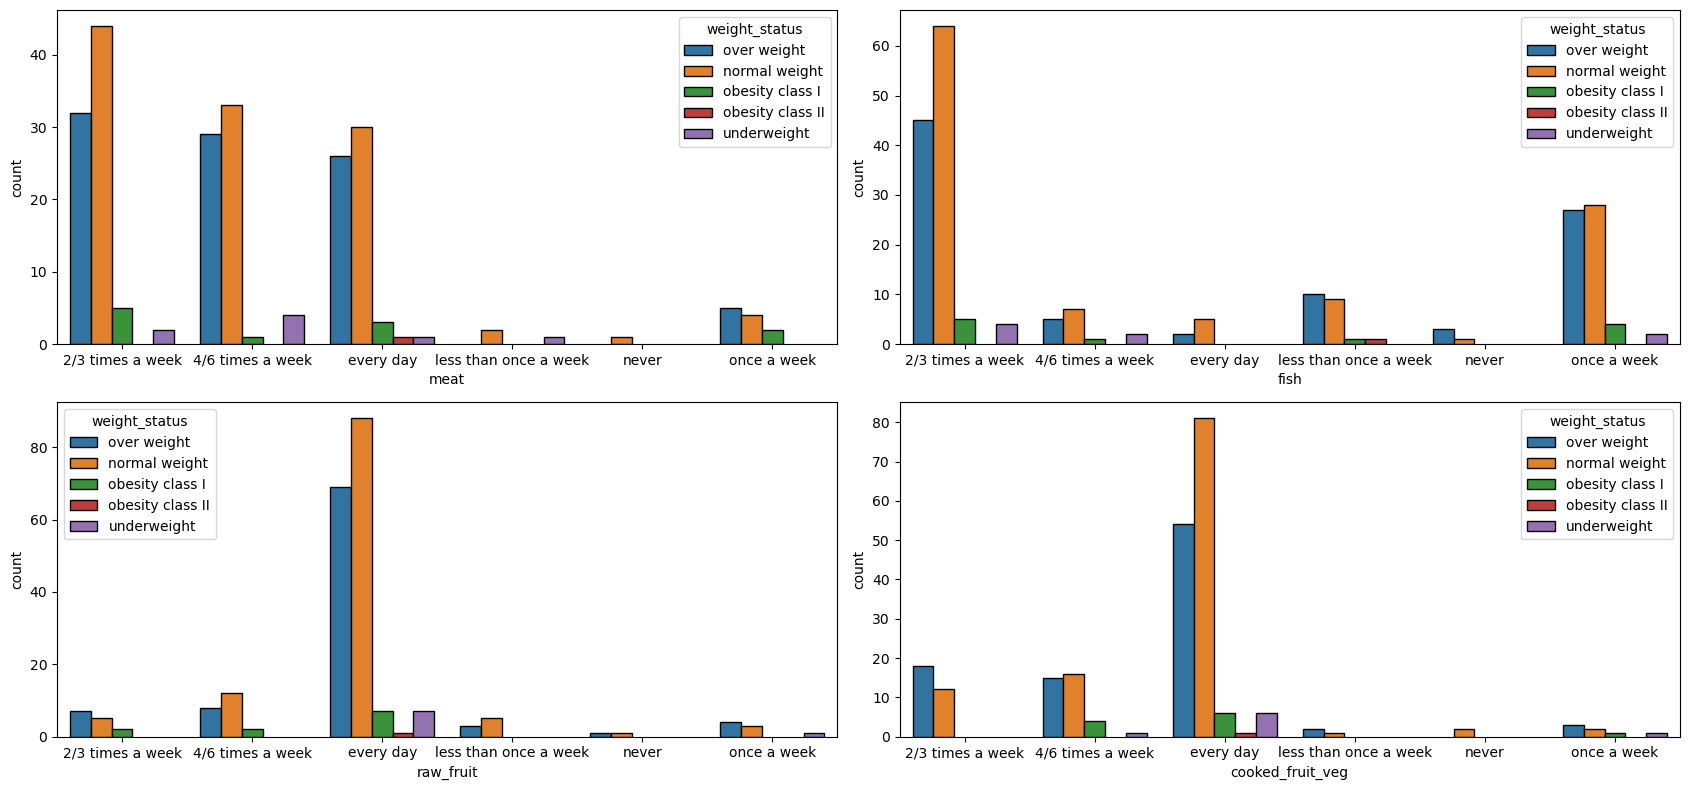

In [391]:
fig, ax = plt.subplots(2,2,figsize=(17,8))

sns.countplot(ax=ax[0][0],x='meat', hue='weight_status', data=dfs, edgecolor='black')
sns.countplot(ax=ax[0][1],x='fish', hue='weight_status', data=dfs, edgecolor='black')
sns.countplot(ax=ax[1][0],x='raw_fruit', hue='weight_status', data=dfs, edgecolor='black')
sns.countplot(ax=ax[1][1],x='cooked_fruit_veg', hue='weight_status', data=dfs, edgecolor='black')

plt.tight_layout()
plt.show()

<AxesSubplot:>

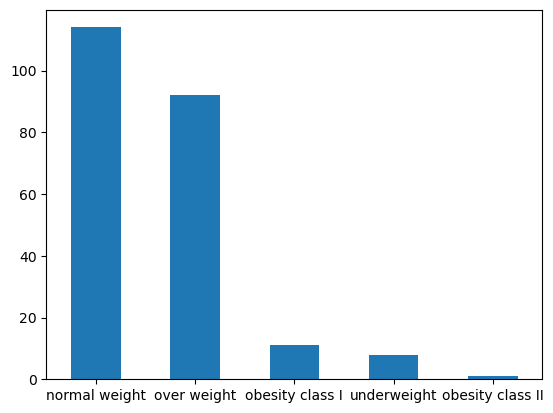

In [374]:
#dfs['weight_status'].value_counts()
dfs['weight_status'].value_counts(sort = True).plot.bar(rot=0) # showing the plot of value counts 

In [342]:
dfs['age'].describe().reset_index() # statistical description of age column

,index,age
0,count,226.000000
1,mean,74.477876
2,std,6.005327
3,min,65.000000
4,25%,70.000000
5,50%,74.000000
6,75%,78.000000
7,max,91.000000


In [343]:
dfs['height'].describe().reset_index() # statistical description of height column

,index,height
0,count,226.000000
1,mean,163.960177
2,std,9.003368
3,min,140.000000
4,25%,157.000000
5,50%,163.000000
6,75%,170.000000
7,max,188.000000


In [344]:
dfs['height'].quantile(q=[0.25,0.5,0.75]) # quantile of height column

0.25    157.0
0.50    163.0
0.75    170.0
Name: height, dtype: float64

In [345]:
dfs['situation'].value_counts()

couple    119
single     98
family      9
Name: situation, dtype: int64

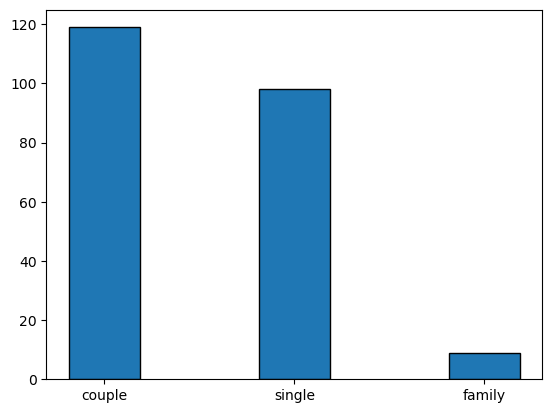

In [346]:
# visualizing the value count of situation observations 
width = 0.25
x = [0, 0.6, 1.2]
situation_counts = dfs['situation'].value_counts()
plt.bar(x,situation_counts, width, edgecolor='black')
plt.xticks(x, situation_counts.index)
plt.show()

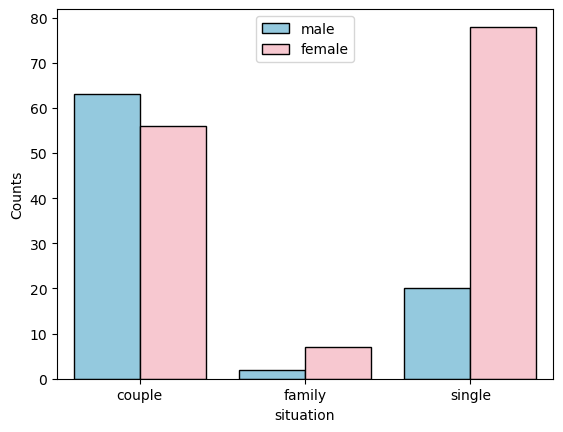

In [349]:
#plot of gender in situation observations
sns.countplot(x='situation', hue='gender', data=dfs, hue_order=['male','female'], 
                palette=['skyblue', 'pink'], edgecolor='black')
plt.legend(loc='upper center')
plt.ylabel('Counts')
plt.show()

In [350]:
males = dfs[dfs.gender == 'male']
females = dfs[dfs.gender == 'female']

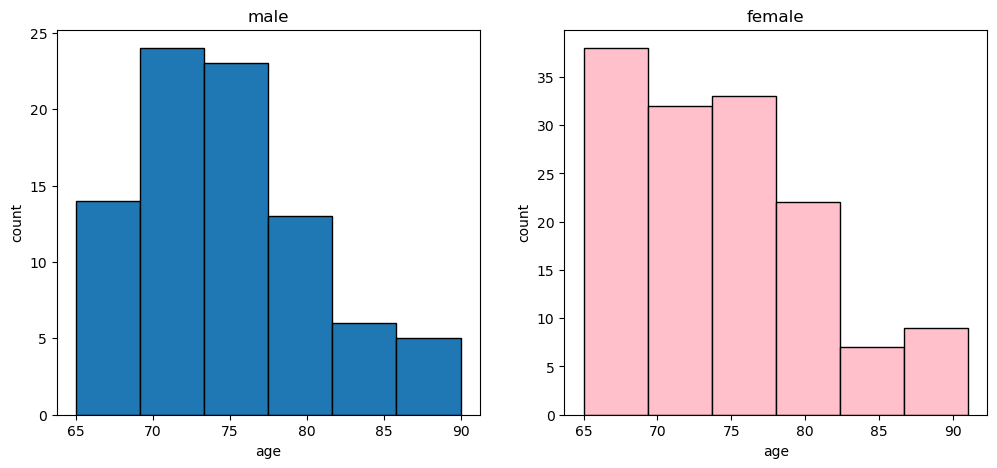

In [351]:
# visualizing the ages of male and female in our dataset
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].hist(males.age, bins=6, edgecolor='black')
ax[0].set_title('male')
ax[0].set_xlabel('age')
ax[0].set_ylabel('count')
ax[1].hist(females.age, bins=6, edgecolor='black', color='pink')
ax[1].set_title('female')
ax[1].set_xlabel('age')
ax[1].set_ylabel('count')
plt.tight_layout
plt.show()

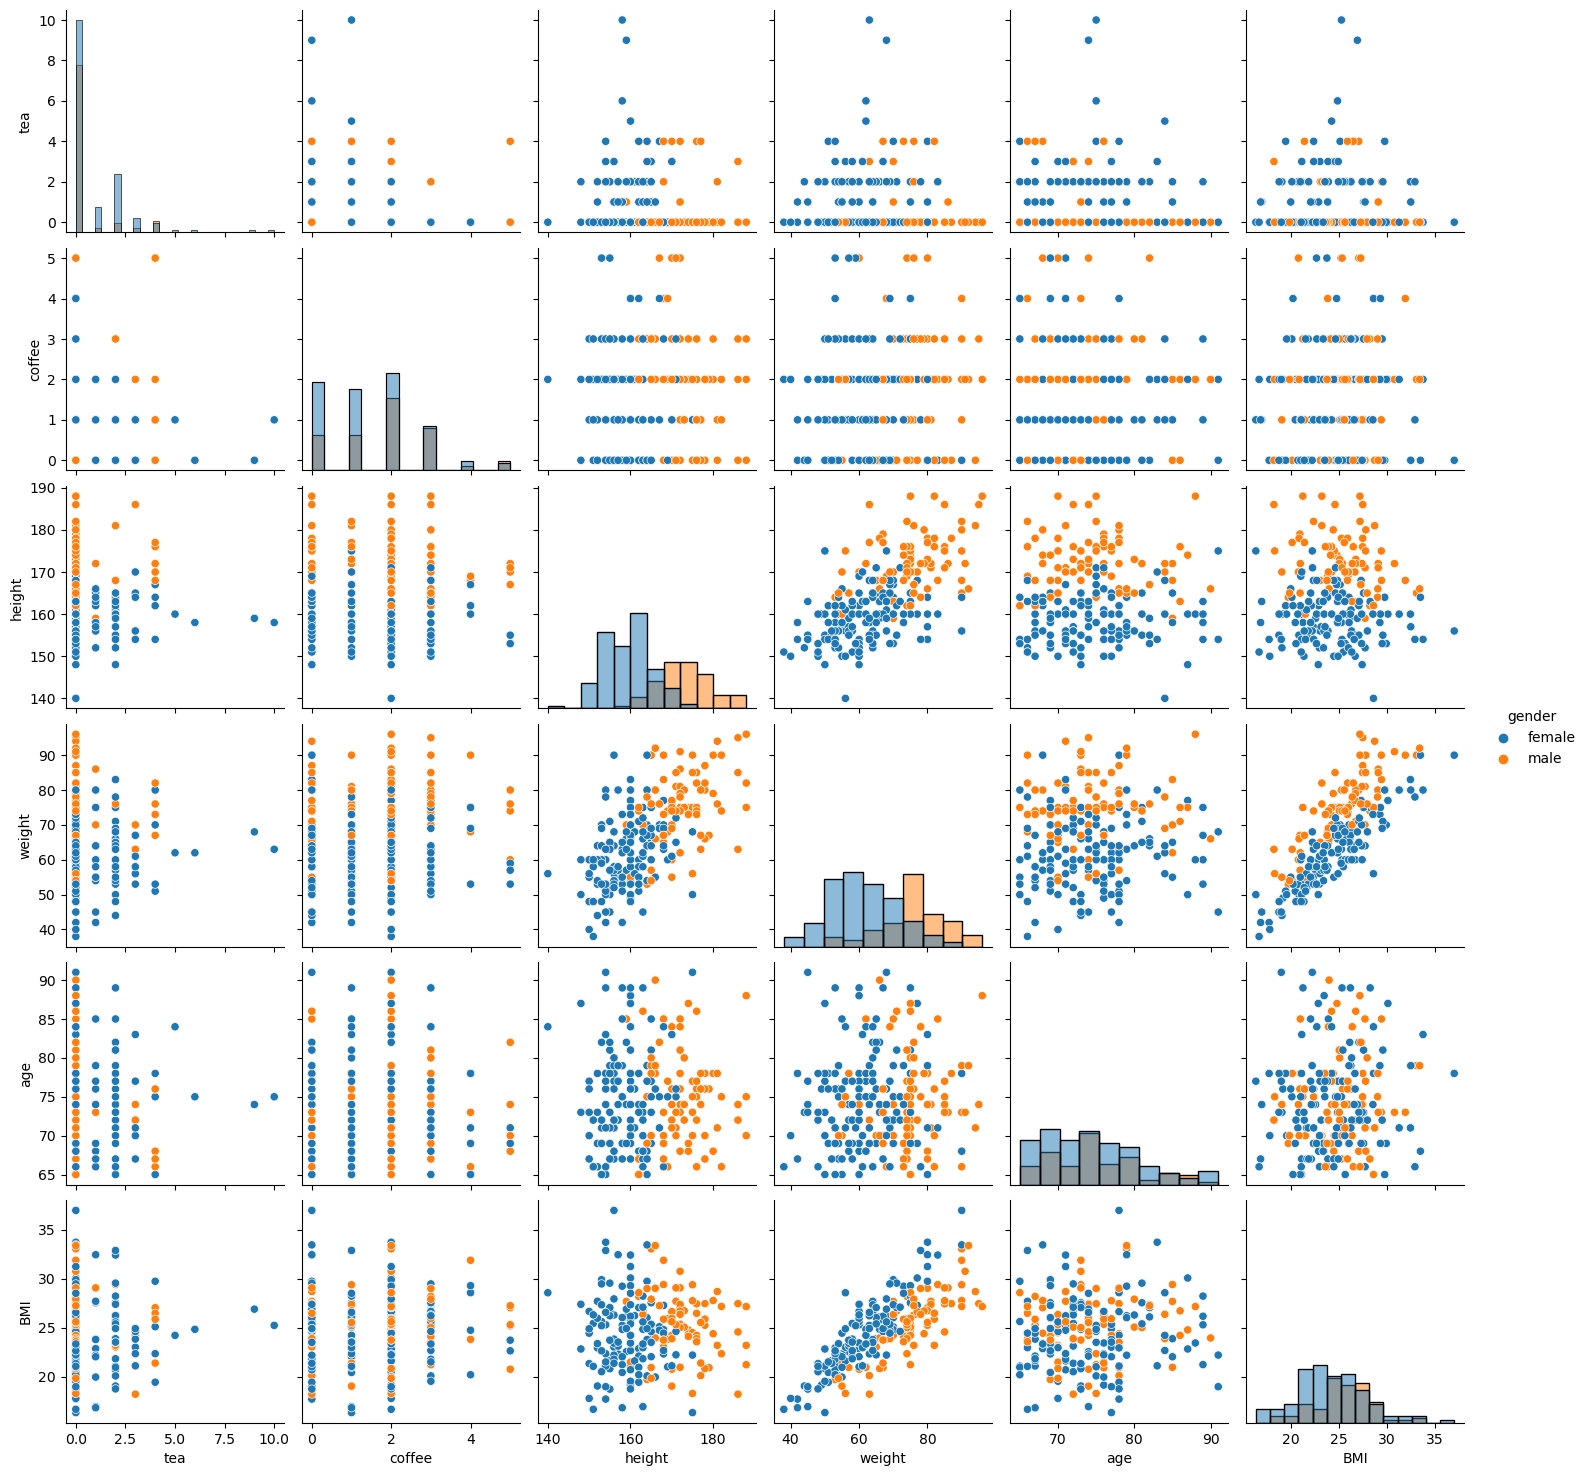

In [353]:
# the correlation between the numerical variables using pairplot
sns.pairplot(dfs, hue='gender', diag_kind='hist')

<AxesSubplot:>

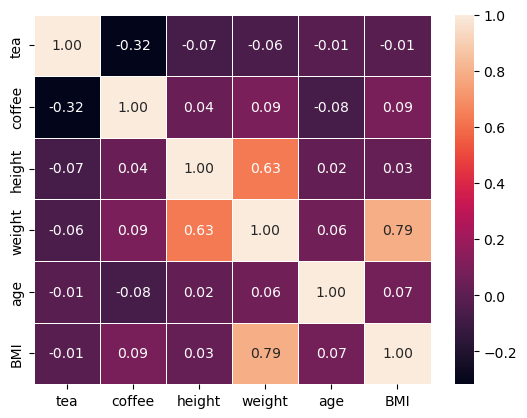

In [354]:
# Create correlation Heatmap for numerical variables 
# Weight/BMI has high correllation, followed by weight and height 
correlation = dfs.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', linewidth=.5)

<AxesSubplot:xlabel='fat', ylabel='count'>

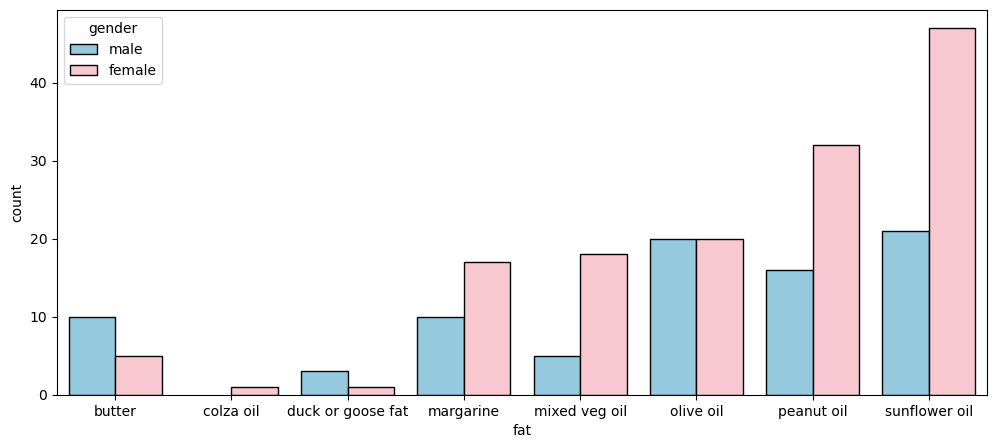

In [355]:
#plot of fat column
plt.figure(figsize=(12,5))
sns.countplot(x='fat', hue='gender', data=dfs, hue_order=['male','female'], 
                palette=['skyblue', 'pink'], edgecolor='black')

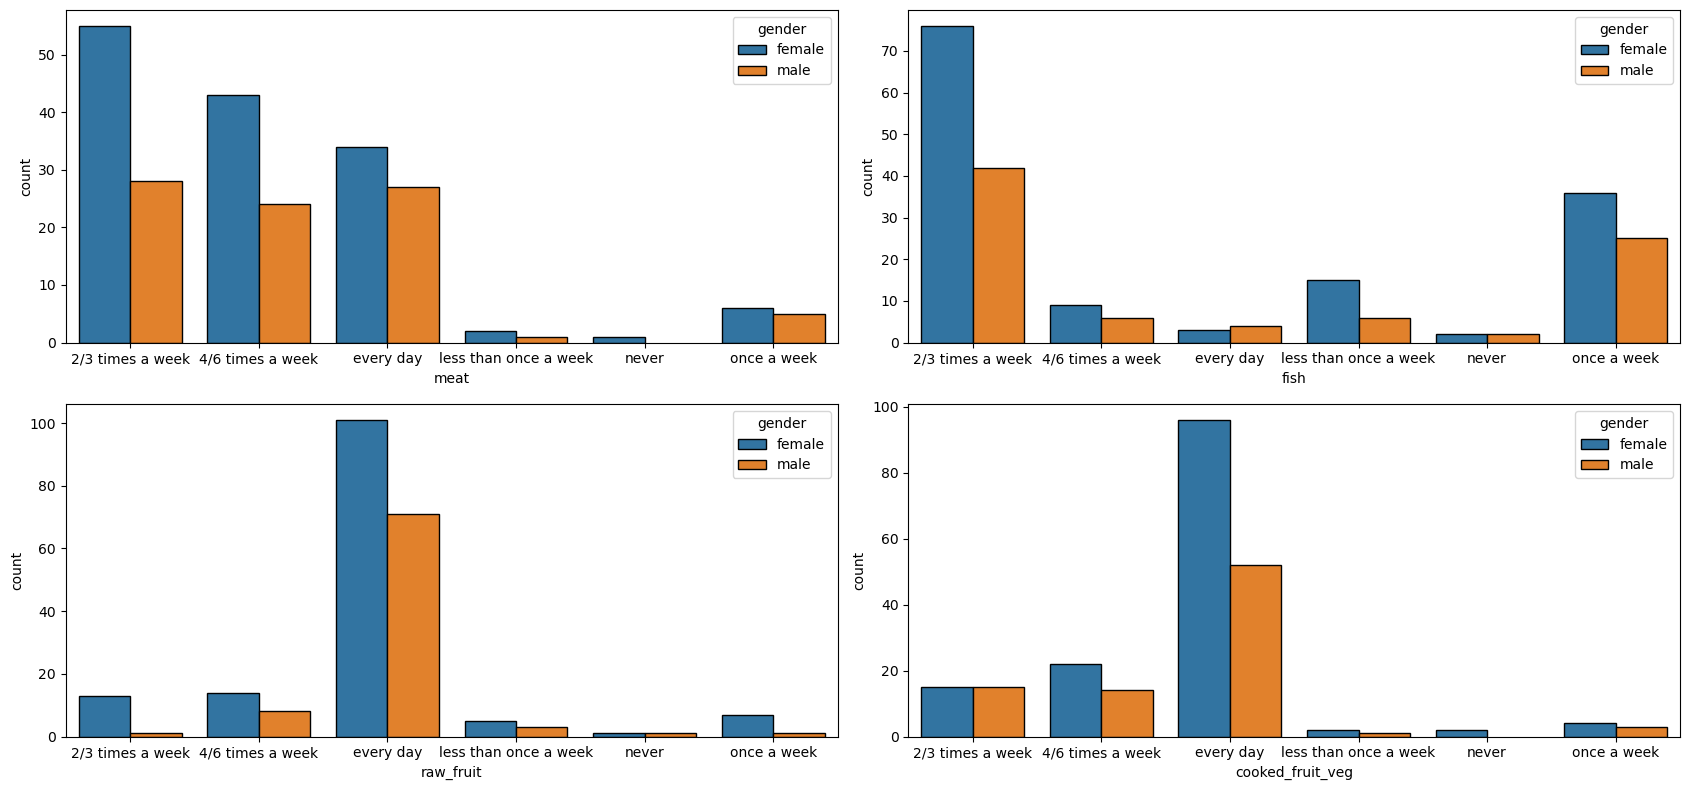

In [410]:
# plot of meat,fish, rawfruit and cooked fruit veg 
fig, ax = plt.subplots(2,2,figsize=(17,8))

sns.countplot(ax=ax[0][0],x='meat', hue='gender', data=dfs, edgecolor='black')

sns.countplot(ax=ax[0][1],x='fish', hue='gender', data=dfs, edgecolor='black') 

sns.countplot(ax=ax[1][0],x='raw_fruit', hue='gender', data=dfs, edgecolor='black')

sns.countplot(ax=ax[1][1],x='cooked_fruit_veg', hue='gender', data=dfs, edgecolor='black') 

plt.tight_layout()
plt.show()

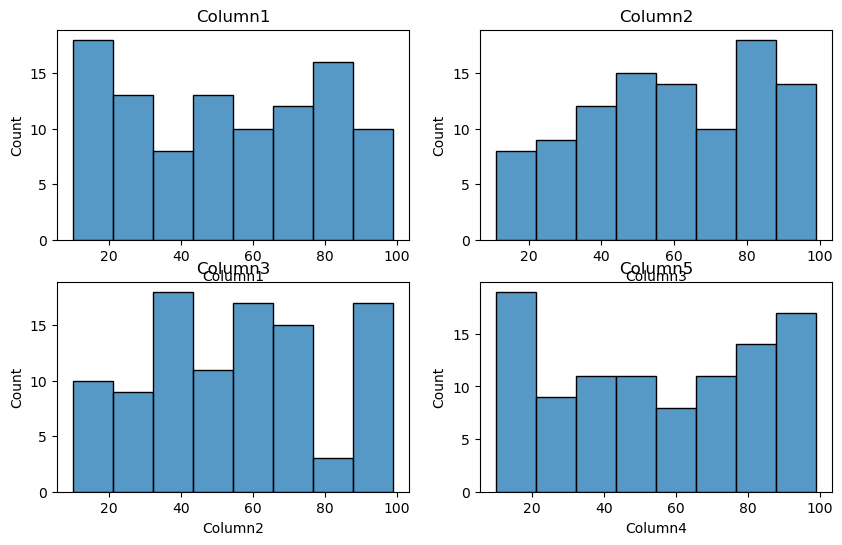

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame
df = pd.DataFrame({
    "Column1": np.random.randint(10, 100, size=100),
    "Column2": np.random.randint(10, 100, size=100),
    "Column3": np.random.randint(10, 100, size=100),
    "Column4": np.random.randint(10, 100, size=100),
    "Column5": np.random.randint(10, 100, size=100),
})

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot each column in a subplot
for i in range(2):
    for j in range(2):
        sns.histplot(df[f"Column{i + 1 + j * 2}"], ax=axes[i, j])

# Add titles to the subplots
axes[0, 0].set_title("Column1")
axes[0, 1].set_title("Column2")
axes[1, 0].set_title("Column3")
axes[1, 1].set_title("Column4")
axes[1, 1].set_title("Column5")

# Show the plot
plt.show()